In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statistics as stat
import math
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn import linear_model
from scipy.stats import t
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [199]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Exercise 13.4

In [200]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/CSV/Ch13HWP1.csv',sep = ',', na_values = ".")
df

,Unnamed: 0,Order,a,b,c,totals
0,0,0,-1,-1,-1,221
1,1,1,1,-1,-1,325
2,2,2,-1,1,-1,354
3,3,3,1,1,-1,552
4,4,4,-1,-1,1,440
5,5,5,1,-1,1,406
6,6,6,-1,1,1,605
7,7,7,1,1,1,392
8,8,8,-1,-1,-1,311
9,9,9,1,-1,-1,435


In [201]:
#Creating arrays for the different measuremnts
a = df[['a']].to_numpy()
b = df[['b']].to_numpy()
c = df[['c']].to_numpy()

In [202]:
#Creating combination arrays
ab = a*b
df['ab'] = ab
ac = a*c
df['ac'] = ac
bc = c*b
df['bc'] = bc
abc = a*b*c
df['abc'] = abc

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  16 non-null     int64
 1   Order       16 non-null     int64
 2   a           16 non-null     int64
 3   b           16 non-null     int64
 4   c           16 non-null     int64
 5   totals      16 non-null     int64
 6   ab          16 non-null     int64
 7   ac          16 non-null     int64
 8   bc          16 non-null     int64
 9   abc         16 non-null     int64
dtypes: int64(10)
memory usage: 1.4 KB


In [204]:
#Added the constant 1 to every row
X = df[['a','b','c','ab','ac','bc','abc']]
X = sm.add_constant(X)
X

,const,a,b,c,ab,ac,bc,abc
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,-1,1,-1,-1,1,-1,1
3,1.0,1,1,-1,1,-1,-1,-1
4,1.0,-1,-1,1,1,-1,-1,1
5,1.0,1,-1,1,-1,1,-1,-1
6,1.0,-1,1,1,-1,-1,1,-1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1


In [205]:
#Creating array for the total tool life
Y = df[['totals',]]
Y

,totals
0,221
1,325
2,354
3,552
4,440
5,406
6,605
7,392
8,311
9,435


In [206]:
#Building Regression Model
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 totals   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     6.665
Date:                Wed, 11 Oct 2023   Prob (F-statistic):            0.00790
Time:                        00:27:51   Log-Likelihood:                -79.629
No. Observations:                  16   AIC:                             175.3
Df Residuals:                       8   BIC:                             181.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.1250     12.406     33.301      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [207]:
#Finding Resdiual
residual1 = res.resid
residual1

0    -45.0
1    -55.0
2      3.0
3     40.0
4     -6.5
5     14.5
6     52.5
7    -13.5
8     45.0
9     55.0
10    -3.0
11   -40.0
12     6.5
13   -14.5
14   -52.5
15    13.5
dtype: float64

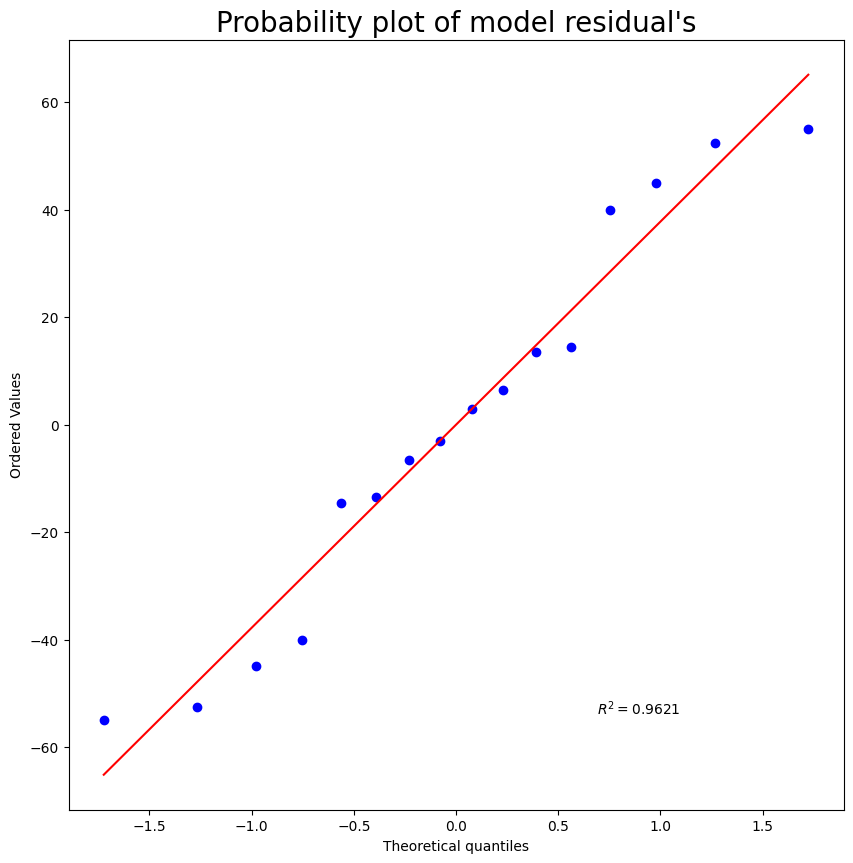

In [208]:
#Creating normality plot
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set
plt.show()

In [209]:
stats.levene(df['totals'][df['a'] == -1],
             df['totals'][df['a'] == 1])

LeveneResult(statistic=2.9911667871195697, pvalue=0.10569523307659201)

In [210]:
stats.levene(df['totals'][df['b'] == -1],
             df['totals'][df['b'] == 1])

LeveneResult(statistic=0.3721709444936149, pvalue=0.5515977352989001)

In [211]:
stats.levene(df['totals'][df['c'] == -1],
             df['totals'][df['c'] == 1])

LeveneResult(statistic=0.6509474436896675, pvalue=0.43326735432278096)

In [212]:
stats.levene(df['totals'][df['ab'] == -1],
             df['totals'][df['ab'] == 1])

LeveneResult(statistic=0.01357802057918744, pvalue=0.9088917080931298)

In [213]:
stats.levene(df['totals'][df['ac'] == -1],
             df['totals'][df['ac'] == 1])

LeveneResult(statistic=0.3347168523993632, pvalue=0.572085178421951)

In [214]:
stats.levene(df['totals'][df['abc'] == -1],
             df['totals'][df['abc'] == 1])

LeveneResult(statistic=5.934828492253794, pvalue=0.028800646584476793)

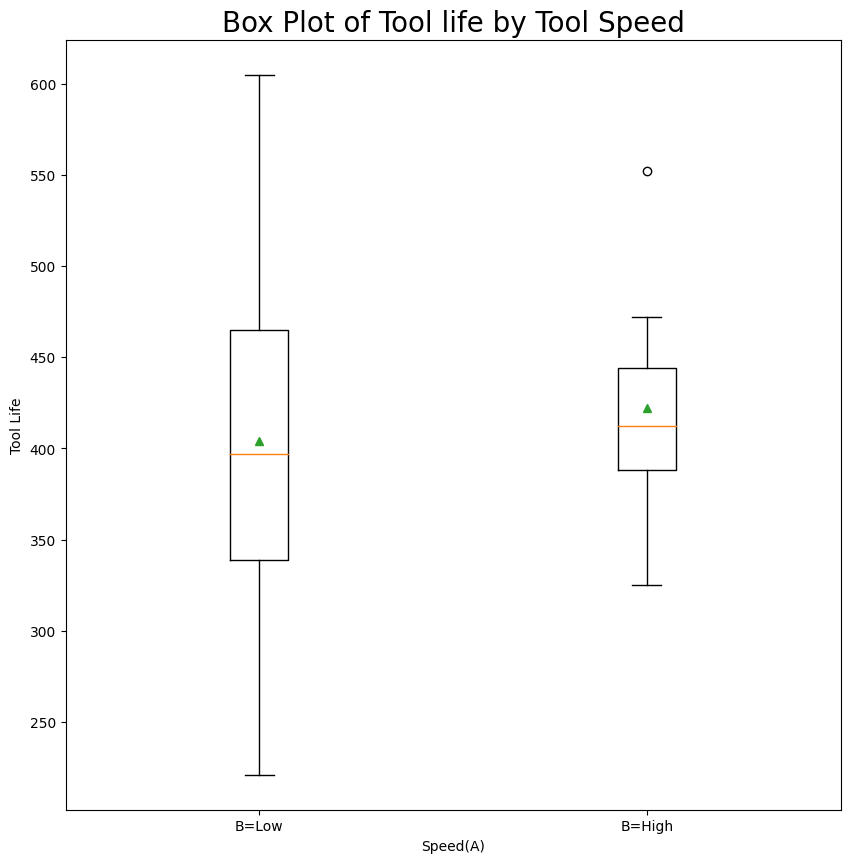

In [215]:
#Creating box plot for (A)
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Tool life by Tool Speed", fontsize= 20)
ax.set
dataa = [df['totals'][df['a'] == -1], df['totals'][df['a'] == +1]]
ax.boxplot(dataa, labels= ['B=Low', 'B=High'], showmeans= True)
plt.xlabel("Speed(A)")
plt.ylabel("Tool Life")
plt.show()

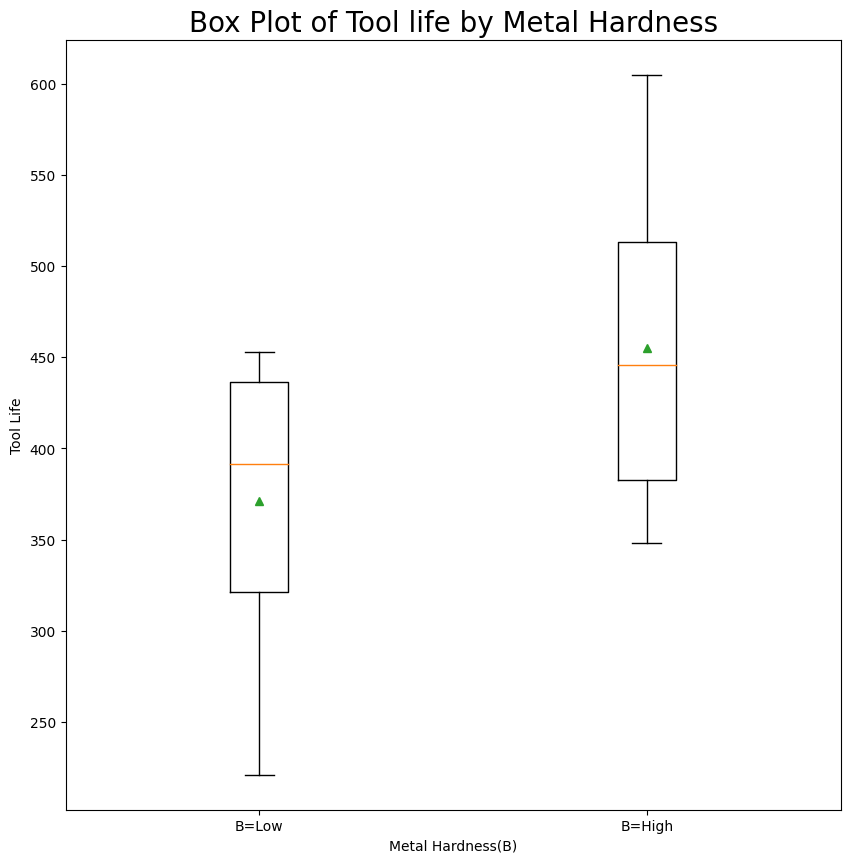

In [216]:
#Creating box plot for (B)
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Tool life by Metal Hardness", fontsize= 20)
ax.set
datab = [df['totals'][df['b'] == -1], df['totals'][df['b'] == +1]]
ax.boxplot(datab, labels= ['B=Low', 'B=High'], showmeans= True)
plt.xlabel("Metal Hardness(B)")
plt.ylabel("Tool Life")
plt.show()

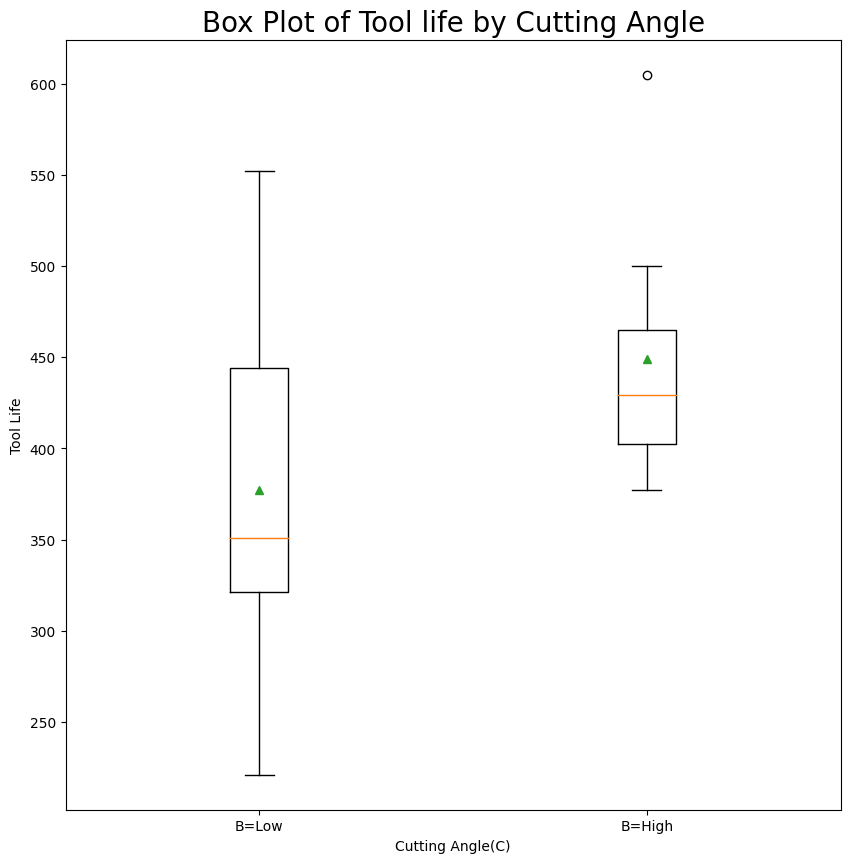

In [217]:
#Creating box plot for (C)
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Tool life by Cutting Angle", fontsize= 20)
ax.set
datac = [df['totals'][df['c'] == -1], df['totals'][df['c'] == +1]]
ax.boxplot(datac, labels= ['B=Low', 'B=High'], showmeans= True)
plt.xlabel("Cutting Angle(C)")
plt.ylabel("Tool Life")
plt.show()

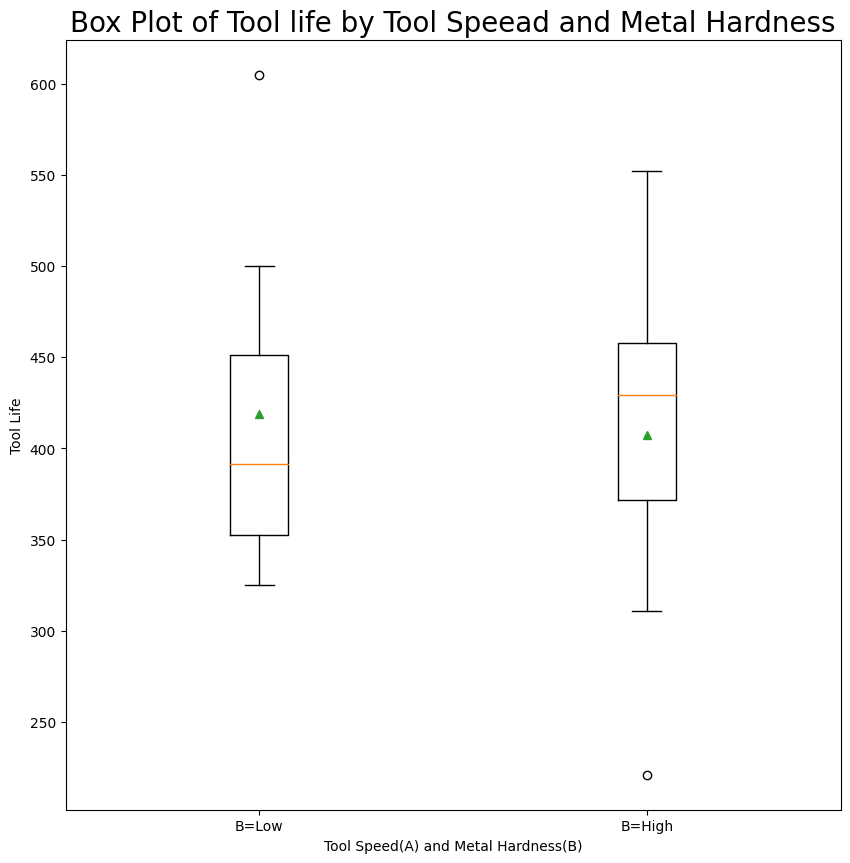

In [218]:
#Creating box plot for (AB)
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Tool life by Tool Speead and Metal Hardness", fontsize= 20)
ax.set
dataab = [df['totals'][df['ab'] == -1], df['totals'][df['ab'] == +1]]
ax.boxplot(dataab, labels= ['B=Low', 'B=High'], showmeans= True)
plt.xlabel("Tool Speed(A) and Metal Hardness(B)")
plt.ylabel("Tool Life")
plt.show()

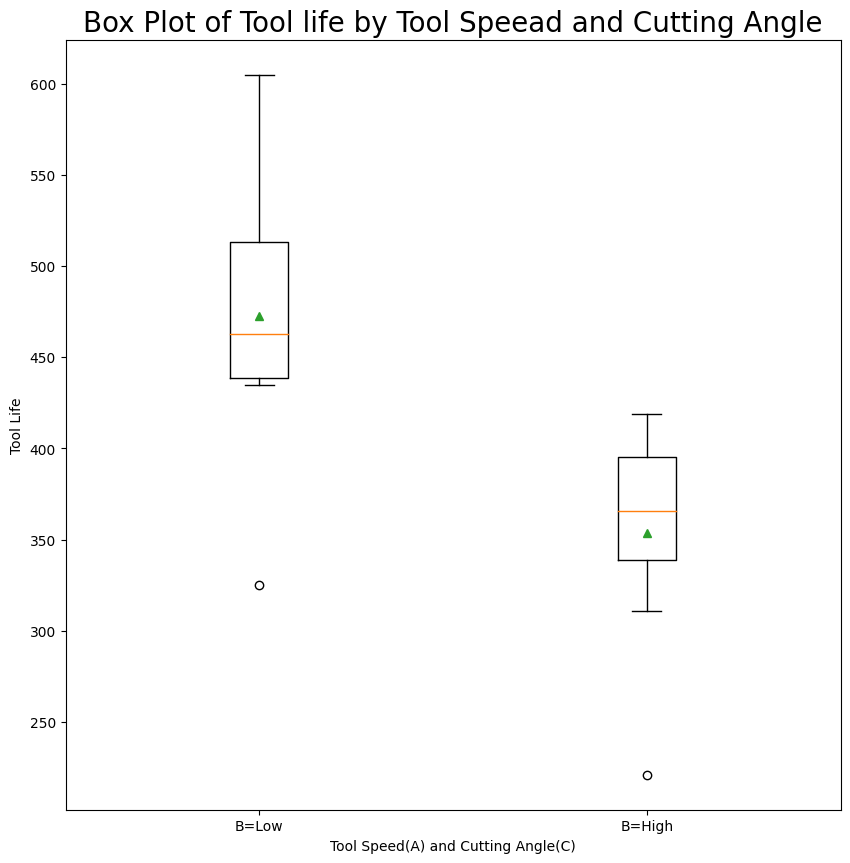

In [219]:
#Creating box plot for (AC)
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Tool life by Tool Speead and Cutting Angle", fontsize= 20)
ax.set
dataac = [df['totals'][df['ac'] == -1], df['totals'][df['ac'] == +1]]
ax.boxplot(dataac, labels= ['B=Low', 'B=High'], showmeans= True)
plt.xlabel("Tool Speed(A) and Cutting Angle(C)")
plt.ylabel("Tool Life")
plt.show()

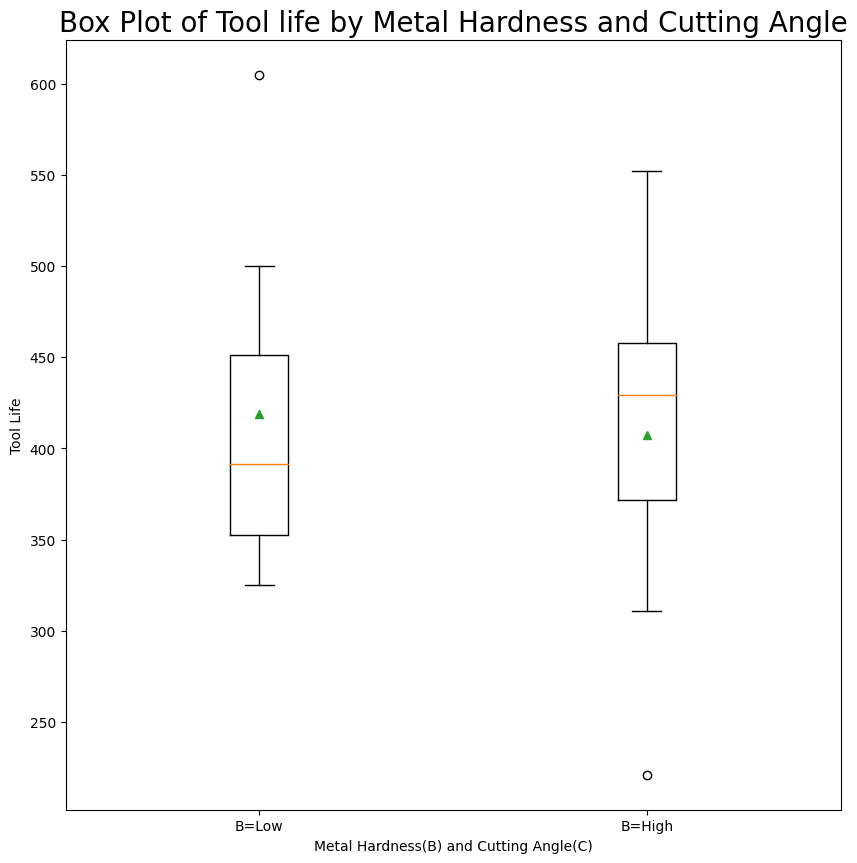

In [220]:
#Creating box plot for (BC)
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Tool life by Metal Hardness and Cutting Angle", fontsize= 20)
ax.set
databc = [df['totals'][df['bc'] == -1], df['totals'][df['bc'] == +1]]
ax.boxplot(dataab, labels= ['B=Low', 'B=High'], showmeans= True)
plt.xlabel("Metal Hardness(B) and Cutting Angle(C)")
plt.ylabel("Tool Life")
plt.show()

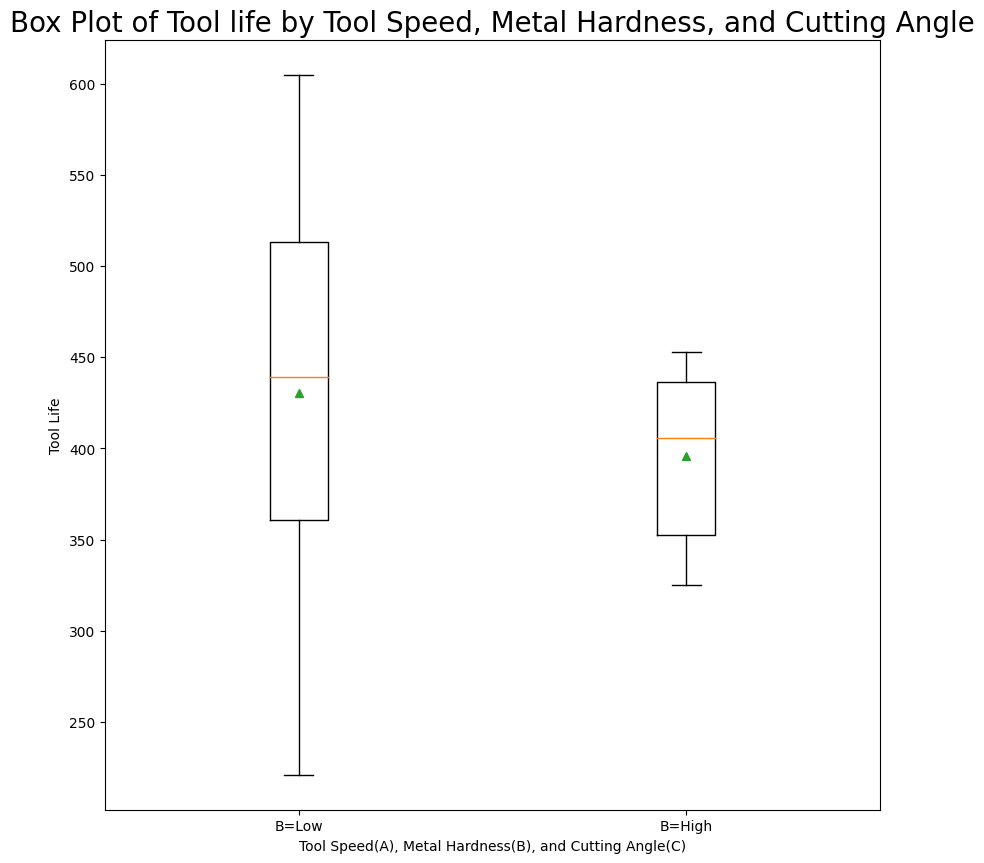

In [221]:
#Creating box plot for (ABC)
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Tool life by Tool Speed, Metal Hardness, and Cutting Angle", fontsize= 20)
ax.set
dataabc = [df['totals'][df['abc'] == -1], df['totals'][df['abc'] == +1]]
ax.boxplot(dataabc, labels= ['B=Low', 'B=High'], showmeans= True)
plt.xlabel("Tool Speed(A), Metal Hardness(B), and Cutting Angle(C)")
plt.ylabel("Tool Life")
plt.show()

In [222]:
eij=res.resid
eij

0    -45.0
1    -55.0
2      3.0
3     40.0
4     -6.5
5     14.5
6     52.5
7    -13.5
8     45.0
9     55.0
10    -3.0
11   -40.0
12     6.5
13   -14.5
14   -52.5
15    13.5
dtype: float64

# Exercise 13.4 Answers
Question A: Since the p value for each of the measurents is large than .05 then we conclude that the parameters do affect the tools life.

Question B: The best combination is a low tool speed and a low cutting angle this yeilded the highest average as seen from all of the boxplots.

Question C: The lowest varience is when the cutting spped is high and the cutting angle is high. This is represented in the boxplot of AC.

## Exercise 13.6

In [223]:
#Reading in Data
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/CSV/Ch13HWP2.csv',sep = ',', na_values = ".")
df2

,Unnamed: 0,Factor,a,b,c,d,total
0,0,0,-1,-1,-1,-1,188
1,1,1,1,-1,-1,-1,172
2,2,2,-1,1,-1,-1,179
3,3,3,1,1,-1,-1,185
4,4,4,-1,-1,1,-1,175
5,5,5,1,-1,1,-1,183
6,6,6,-1,1,1,-1,190
7,7,7,1,1,1,-1,175
8,8,8,-1,-1,-1,1,200
9,9,9,1,-1,-1,1,170


In [233]:
#Storing data in array and creating two sample arrays
a2 = df2[['a']].to_numpy()
b2 = df2[['b']].to_numpy()
c2 = df2[['c']].to_numpy()
d2 = df2[['d']].to_numpy()
ab2 = a2*b2
df2['ab'] = ab2
ac2 = a2*c2
df2['ac'] = ac2
ad2 = a2*d2
df2['ad'] = ad2
bc2 = b2*c2
df2['bc'] = bc2
bd2 = b2*d2
df2['bd'] = bd2
cd2 = c2*d2
df2['cd'] = cd2
abc2 = a2*b2*c2
df2['abc'] = abc2
bcd2 = b2*c2*d2
df2['bcd'] = bcd2
abd2 = a2*b2*d2
df2['abd'] = abd2
acd2 = a2*c2*d2
df2['acd'] = acd2
abcd2 = a2*b2*c2*d2
df2['abcd'] = abcd2

In [234]:
#Adding the constant 1
X2 = df2[['a',	'b',	'ab',	'c', 'ac',	'bc',	'abc',	'd', 'ad', 'bd', 'abd', 'cd', 'acd', 'bcd', 'abcd']]
X2= sm.add_constant(X2)
X2

,const,a,b,ab,c,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd
0,1.0,-1,-1,1,-1,1,1,-1,-1,1,1,-1,1,-1,-1,1
1,1.0,1,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1,-1,-1
2,1.0,-1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1
3,1.0,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1
4,1.0,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1,1,-1
5,1.0,1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,-1,1,1
6,1.0,-1,1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,-1,1
7,1.0,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
8,1.0,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1


In [226]:
#Creating array of Totals
Y2 = df2[['total',]]
Y2

,total
0,188
1,172
2,179
3,185
4,175
5,183
6,190
7,175
8,200
9,170


In [235]:
#Creating Regression Model
model2 = sm.OLS(Y2, X2)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3.471
Date:                Wed, 11 Oct 2023   Prob (F-statistic):            0.00917
Time:                        00:41:20   Log-Likelihood:                -88.141
No. Observations:                  32   AIC:                             208.3
Df Residuals:                      16   BIC:                             231.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.7813      0.950    192.314      0.0

In [236]:
# Finding Residuals
residual2 = res2.resid
residual2

0    -3.5
1    -4.0
2    -4.0
3     3.5
4    -2.5
5     2.5
6     5.0
7     3.5
8     3.5
9    -4.0
10    4.0
11   -2.5
12    6.5
13    4.0
14    3.5
15   -2.0
16    3.5
17    4.0
18    4.0
19   -3.5
20    2.5
21   -2.5
22   -5.0
23   -3.5
24   -3.5
25    4.0
26   -4.0
27    2.5
28   -6.5
29   -4.0
30   -3.5
31    2.0
dtype: float64

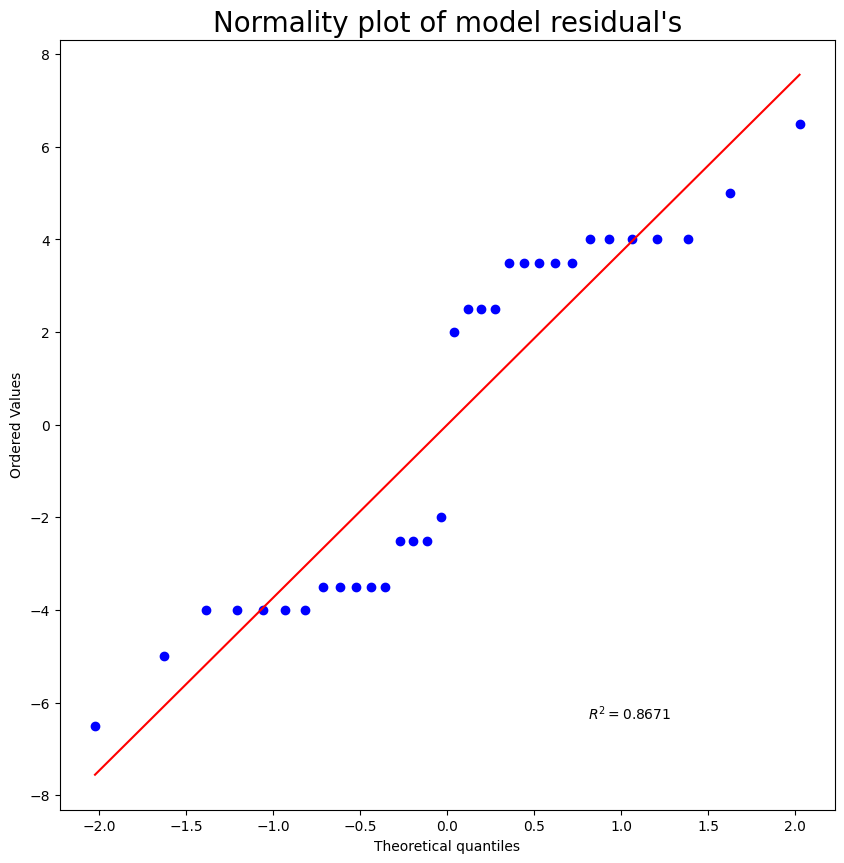

In [238]:
#Creating Normality Plots
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Normality plot of model residual's", fontsize= 20)
ax.set
plt.show()

# Exercise 13.6 Answer
From the Residual Analysis the highest t value is abd, but the normality plot of the residuals in not very good so the experient should be run again to ensure quality results.